# Analysis of User Acquisition Channel Effectiveness for a Mobile Game

Client - a game developer, purchases advertising from third-party sources. The task is to understand how to best attract players to the game. To do this, it is necessary to rank the channels by their effectiveness and determine which platform is more effective. Effectiveness here is defined as the ratio of cost of acquisition to audience quality.

In the game, there are two victory strategies:

1. Complete a project (PvE), in which case the completed project "Orbital Satellite Assembly" will be indicated in events preceding the level's completion.
2. Eliminate the enemy

A level is considered completed after clicking the "Proceed to the next level" button and is recorded in the logs as an event.

In the game, there is also building construction, and advertisements appear during construction. It is known that the cost of displaying an ad is 0.07 cents. The types of buildings are:
- Assembly Workshop: for hiring workers. The more assembly workshops, the faster further construction progresses.
- Spaceport: for recruiting an army.
- 
Research Center: available type - Orbital Satellite Assembly.

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-User-Acquisition-Channel-Effectiveness-for-a-Mobile-Game" data-toc-modified-id="Analysis-of-User-Acquisition-Channel-Effectiveness-for-a-Mobile-Game-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of User Acquisition Channel Effectiveness for a Mobile Game</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Missing-Values-and-Data-Types" data-toc-modified-id="Missing-Values-and-Data-Types-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Missing Values and Data Types</a></span></li><li><span><a href="#Duplicates-and-Table-Concatenation" data-toc-modified-id="Duplicates-and-Table-Concatenation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Duplicates and Table Concatenation</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Users-by-Sources" data-toc-modified-id="Users-by-Sources-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Users by Sources</a></span></li><li><span><a href="#Users-by-strategy" data-toc-modified-id="Users-by-strategy-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Users by strategy</a></span></li><li><span><a href="#Users-by-the-number-of-events-per-day." data-toc-modified-id="Users-by-the-number-of-events-per-day.-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Users by the number of events per day.</a></span></li><li><span><a href="#Buildings" data-toc-modified-id="Buildings-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Buildings</a></span></li><li><span><a href="#Level-completion" data-toc-modified-id="Level-completion-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Level completion</a></span></li><li><span><a href="#Duration" data-toc-modified-id="Duration-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Duration</a></span></li><li><span><a href="#Cost" data-toc-modified-id="Cost-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Cost</a></span><ul class="toc-item"><li><span><a href="#The-cost-per-click-from-each-source." data-toc-modified-id="The-cost-per-click-from-each-source.-1.2.7.1"><span class="toc-item-num">1.2.7.1&nbsp;&nbsp;</span>The cost per click from each source.</a></span></li><li><span><a href="#The-total-amount-spent-on-each-source" data-toc-modified-id="The-total-amount-spent-on-each-source-1.2.7.2"><span class="toc-item-num">1.2.7.2&nbsp;&nbsp;</span>The total amount spent on each source</a></span></li></ul></li><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Hypothesis</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Analysis-and-Ranking-of-User-Acquisition-Sources" data-toc-modified-id="Analysis-and-Ranking-of-User-Acquisition-Sources-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Analysis and Ranking of User Acquisition Sources</a></span></li></ul></li></ul></li></ul></div>

Three datasets are available for analysis:
1. "game" with logs from May 4th to June 5th.
2. "ad" with advertising activities from May 3rd to May 9th.
3. "user" with the user acquisition channel information for each user.

Let's load the datasets for initial processing.

## Preprocessing

In [127]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [128]:
game = pd.read_csv('https://code.s3.yandex.net/datasets/game_actions.csv')
ad = pd.read_csv('https://code.s3.yandex.net/datasets/ad_costs.csv')
user = pd.read_csv('https://code.s3.yandex.net/datasets/user_source.csv')
game.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


### Missing Values and Data Types

In [129]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [130]:
#Convert data types to datetime.
game['event_datetime'] = pd.to_datetime(game['event_datetime'])

In [131]:
display(ad.head(30))
ad.info()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [132]:
# Convert to date
ad['day'] = pd.to_datetime(ad['day'])
ad['cost'] = ad['cost'].round(2)

In [133]:
display(user.head())
user.info()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [134]:
game.event.unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

The "game" dataset contains 135,640 rows and missing values in the "building_type" and "project_type" columns.

It is known that the missing values in "building_type" and "project_type" occurred because, if a building is being constructed (event = building), the project type will not be specified, only the building type will be indicated, and vice versa. There is also a value "finished_stage_1," for which nothing should be specified in "building_type" and "project_type." The sum of these values should be equal to 135,640. Let's verify.

In [135]:
#count the occurrences of different event types
events = ['building', 'project', 'finished_stage_1']

for event in events:
    count = game[game['event'] == event].shape[0]
    print(f'{event}: {count}')

total_count = game.shape[0]
print(f'Итого: {total_count}')

building: 127957
project: 1866
finished_stage_1: 5817
Итого: 135640


exclude the possibility of errors

In [136]:
# check the condition that if a building is being constructed (event = building), 
#then the project type will not be specified, only the building type will be indicated
((game['event'] == 'building') & (game['building_type'].notna()) & (game['project_type'].isna())).sum()

127957

In [137]:
# and vice versa
((game['event'] == 'project') & (game['project_type'].notna()) & (game['building_type'].isna())).sum()

1866

In [138]:
# In the case of "finished_stage_1," both building and project types should be empty.
((game['event'] == 'finished_stage_1') & (game['project_type'].isna()) & (game['building_type'].isna())).sum()

5817

Everything is correct; no additional processing is needed for the missing values in the data.

### Duplicates and Table Concatenation

In [139]:
# List of DataFrames and their names
dataframes = [(game, 'game'), (ad, 'ad'), (user, 'user')]

# Iterate through each DataFrame and their names in a loop
for df, df_name in dataframes:
    duplicates = df[df.duplicated()]
    
    # Display duplicates if they exist
    if not duplicates.empty:
        print(f"Duplicates found in {df_name}:\n{duplicates.to_string(index=False)}")
    else:
        print(f"No duplicates found in {df_name}.")

Duplicates found in game:
     event_datetime    event   building_type                              user_id project_type
2020-05-10 18:41:56 building research_center c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af          NaN
No duplicates found in ad.
No duplicates found in user.


A duplicate has been found in the "game" dataset; let's remove it.

In [140]:
game = game.drop_duplicates()

For simplicity, let's combine the "game" and "user" datasets after analyzing the number of unique users in each of them.

In [141]:
game['user_id'].nunique()

13576

In [142]:
user['user_id'].nunique()

13576

In [143]:
#merge datasets
game_source = pd.merge(game, user, on='user_id', how='inner')

In [144]:
game_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
 5   source          135639 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 7.2+ MB


In [145]:
game_source.head()

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama


**Now, each user is associated with the source from which they came and installed the application.**

**Additionally, we will add a column indicating the user's strategy. It is known that users can:**

1. Complete a project (PvE), in this case, the events preceding the level's completion will indicate the completed project "Orbital Satellite Assembly."

2. Eliminate an enemy, in this case, the level will be completed, but the project will not be executed.

3. Not finish the level.

In [146]:
# determine strategy
def determine_strategy(group):
    if 'finished_stage_1' in group.values and 'project' not in group.values:
        return 'war'
    elif 'finished_stage_1' in group.values and 'project' in group.values:
        return 'project'
    else:
        return 'not finished'

# apply a function to groups grouped by 'user_id' and create a 'strategy' column.
game_source['strategy'] = game_source.groupby('user_id')['event'].transform(determine_strategy).astype('object')

In [147]:
#check that everyone who completed the level did not fall into 'not_finished'.
game_source.query('strategy=="not_finished" and event=="finished_stage_1"')

,event_datetime,event,building_type,user_id,project_type,source,strategy


In [148]:
#check the remaining conditions.
game_source.sort_values(by='user_id', ascending=False).head(14)

,event_datetime,event,building_type,user_id,project_type,source,strategy
127785,2020-05-17 22:48:25,building,research_center,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127782,2020-05-15 08:36:25,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127790,2020-05-25 14:05:51,finished_stage_1,NaN,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127789,2020-05-25 07:09:53,building,research_center,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127788,2020-05-25 03:55:06,project,NaN,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,satellite_orbital_assembly,facebook_ads,project
127787,2020-05-24 12:52:53,building,research_center,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127786,2020-05-23 06:00:10,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127784,2020-05-16 11:39:58,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127783,2020-05-16 04:29:30,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project
127781,2020-05-13 10:59:39,building,spaceport,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,NaN,facebook_ads,project


In [149]:
# create columns 'first_day' and 'last_day', containing the first and last dates for each 'user_id'
game_source['first_day'] = game_source.groupby('user_id')['event_datetime'].transform('min').dt.date
game_source['last_day'] = game_source.groupby('user_id')['event_datetime'].transform('max').dt.date
# number of days for each user_id
game_source['duration'] = (game_source['last_day'] - game_source['first_day']).apply(lambda x: x.days + 1)
game_source.query('duration==2') 

,event_datetime,event,building_type,user_id,project_type,source,strategy,first_day,last_day,duration
1307,2020-05-04 00:22:48,building,assembly_shop,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,war,2020-05-04,2020-05-05,2
1308,2020-05-04 17:32:03,building,spaceport,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,war,2020-05-04,2020-05-05,2
1309,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,war,2020-05-04,2020-05-05,2
3249,2020-05-04 00:57:02,building,assembly_shop,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,youtube_channel_reklama,war,2020-05-04,2020-05-05,2
3250,2020-05-04 03:32:03,building,spaceport,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,youtube_channel_reklama,war,2020-05-04,2020-05-05,2
...,...,...,...,...,...,...,...,...,...,...
133667,2020-05-09 21:18:48,building,assembly_shop,6ba5b56b-4bca-4896-81de-30d177d3a0c6,NaN,youtube_channel_reklama,not finished,2020-05-09,2020-05-10,2
133668,2020-05-10 19:18:43,building,spaceport,6ba5b56b-4bca-4896-81de-30d177d3a0c6,NaN,youtube_channel_reklama,not finished,2020-05-09,2020-05-10,2
134496,2020-05-10 06:40:21,building,assembly_shop,c9c45166-11da-49b0-9126-6c03c34ef3e8,NaN,yandex_direct,not finished,2020-05-10,2020-05-11,2
134497,2020-05-11 13:08:35,building,spaceport,c9c45166-11da-49b0-9126-6c03c34ef3e8,NaN,yandex_direct,not finished,2020-05-10,2020-05-11,2


**As a result, during the data preprocessing:**
- Three datasets were loaded.
- Missing values were handled, and data types were converted to the required format.
- Duplicates were removed.
- Tables were merged, creating a new column reflecting the user's strategy.
- Columns with the first and last days in the game were added, along with the number of days.

## Exploratory Analysis

### Users by Sources

First, let's take a look at the overall distribution of the number of events by days.

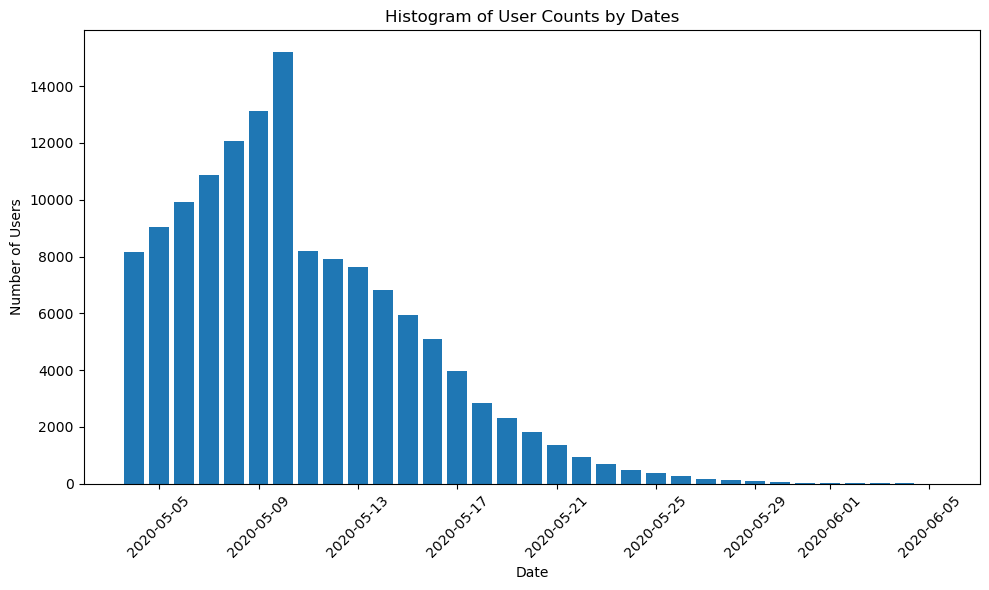

In [150]:
daily_user_count = game_source.groupby(game_source['event_datetime'].dt.date)['user_id'].count()

# hist
plt.figure(figsize=(10, 6))
plt.bar(daily_user_count.index, daily_user_count.values, width=0.8)
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Histogram of User Counts by Dates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since we are analyzing a cohort of users who joined the game between May 4th and May 10th, the histogram shows that the number of users is increasing until that date and then gradually starts to decrease.

Let's create datasets for user acquisition channels and analyze the proportion of users acquired from different channels.

In [151]:
youtube = game_source.query('source=="youtube_channel_reklama"')
fb = game_source.query('source=="facebook_ads"')
insta = game_source.query('source=="instagram_new_adverts"')
ya = game_source.query('source=="yandex_direct"')

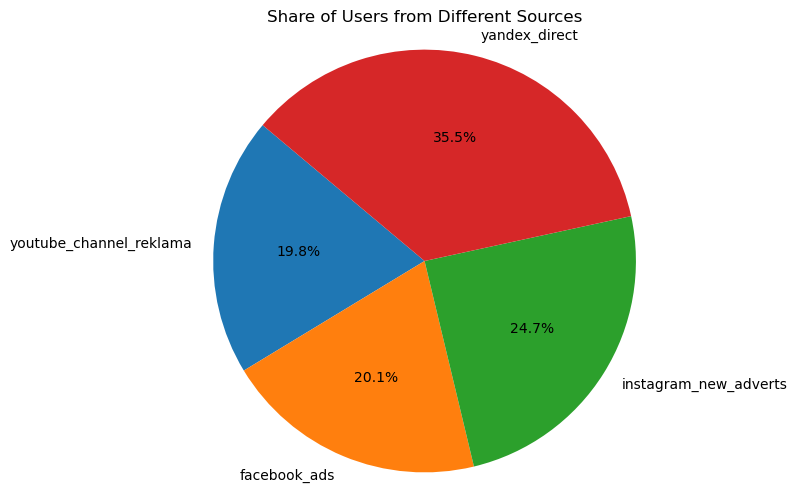

In [152]:
channels = ["youtube_channel_reklama", "facebook_ads", "instagram_new_adverts", "yandex_direct"]
unique_users = [len(channel['user_id'].unique()) for channel in [youtube, fb, insta, ya]]

# pie
plt.figure(figsize=(6, 6))
plt.pie(unique_users, labels=channels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title("Share of Users from Different Sources")
plt.show()

The largest number of unique users in the cohort from May 4th to May 10th came from the Yandex channel, while YouTube was at the bottom. Let's see how the distribution has changed over the days.

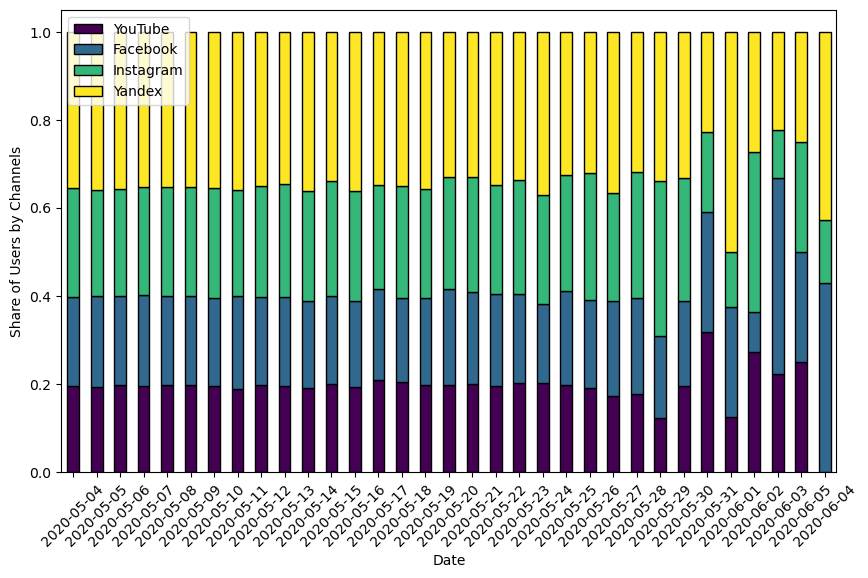

In [153]:
# group the data by date and calculate the number of unique users for each channel.
youtube_daily_users = youtube.groupby(youtube['event_datetime'].dt.date)['user_id'].nunique()
fb_daily_users = fb.groupby(fb['event_datetime'].dt.date)['user_id'].nunique()
insta_daily_users = insta.groupby(insta['event_datetime'].dt.date)['user_id'].nunique()
ya_daily_users = ya.groupby(ya['event_datetime'].dt.date)['user_id'].nunique()

# Combine the data into one DataFrame and fill in missing values with 0
combined_data = pd.concat([youtube_daily_users, fb_daily_users, insta_daily_users, ya_daily_users], axis=1).fillna(0)
combined_data.columns = ['YouTube', 'Facebook', 'Instagram', 'Yandex']

# DataFrame with user shares by channels.
channel_share = combined_data.div(combined_data.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

channel_share.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', ax=ax)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Share of Users by Channels')
plt.legend(loc='upper left')
plt.show()

Overall, in the first 7 days, the shares remain stable, around 20% for YouTube, Facebook, and slightly more for Instagram. Yandex is around 30%. The increased volatility towards the end of the period is likely a result of fewer players during those days.

Let's see which strategy users choose more often and how many of them did not complete the game.

In [154]:
game_source.groupby('source')['user_id'].nunique().sort_values()

source
youtube_channel_reklama    2686
facebook_ads               2726
instagram_new_adverts      3347
yandex_direct              4817
Name: user_id, dtype: int64

### Users by strategy

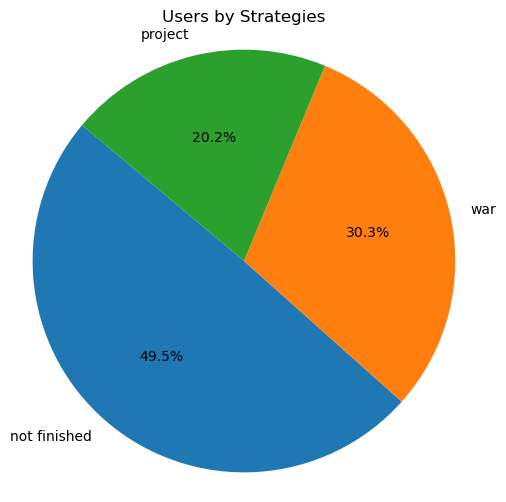

In [155]:
# Creating data for distributing users by strategies.
strategy_counts = game_source['strategy'].value_counts()

# Creating a pie chart 
plt.figure(figsize=(6, 6))
plt.pie(strategy_counts, labels=strategy_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # with equal axes to create a circular diagram.
plt.title('Users by Strategies')

plt.show()

Nearly half of all users did not complete the game, and the war strategy is more popular than the project strategy. Let's see if the shares change depending on the user acquisition channel.

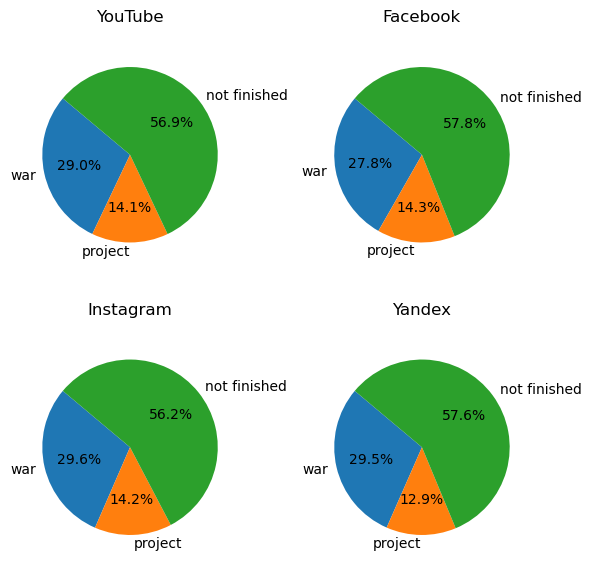

In [156]:
channel_names = ['YouTube', 'Facebook', 'Instagram', 'Yandex']
# Creating subsets for each of the strategies
strategies = ['war', 'project', 'not finished']

# Determining the number of rows and columns for arranging the plots
rows = 2
columns = 2

# Creating the figure and subplots
fig, axs = plt.subplots(rows, columns, figsize=(6, 6))

# Iterate through the channels and create pie charts.
for i, channel in enumerate(channels):
    channel_data = game_source.query(f'source == "{channel}"')
    channel_strategies = [channel_data.query(f'strategy == "{strategy}"')['user_id'].nunique() for strategy in strategies]
    ax = axs[i // columns, i % columns]  # Selecting the appropriate subplot.
    ax.pie(channel_strategies, labels=strategies, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(channel_names[i])

plt.tight_layout()
plt.show()

We can see that the proportion of users choosing different strategies varies insignificantly depending on the channel. Let's test the hypothesis:
- Null Hypothesis (H0): The choice of strategy is independent of the user acquisition channel. In other words, the user acquisition channel and the choice of strategy are independent.
- Alternative Hypothesis (H1): The choice of strategy depends on the user acquisition channel.

In [157]:
# Create a cross-table with unique user_id
cross_table = pd.crosstab(game_source['source'], game_source['strategy'], values=game_source['user_id'], aggfunc='nunique')

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(cross_table)

# Assess the statistical significance
if p < 0.05:
    print("There is a statistically significant dependency between the choice of strategy and the user acquisition channel.")
else:
    print("There is no statistically significant dependency between the choice of strategy and the user acquisition channel.")

There is no statistically significant dependency between the choice of strategy and the user acquisition channel.


The null hypothesis has been confirmed; there is no dependency.

### Users by the number of events per day.

In [158]:
# group the data by day and 'user_id' and count the number of events.
daily_event_counts = game_source.groupby([game_source['event_datetime'].dt.date])['event'].count().reset_index()
daily_event_counts.head()

,event_datetime,event
0,2020-05-04,8171
1,2020-05-05,9055
2,2020-05-06,9925
3,2020-05-07,10858
4,2020-05-08,12059


In [159]:
daily_user_counts = game_source.groupby([game_source['event_datetime'].dt.date])['user_id'].nunique().reset_index()
daily_user_counts.head()

,event_datetime,user_id
0,2020-05-04,5860
1,2020-05-05,6382
2,2020-05-06,6854
3,2020-05-07,7384
4,2020-05-08,7891


In [160]:
data = daily_event_counts.merge(daily_user_counts, on='event_datetime')

# rename columns
data.columns = ['date', 'event_count', 'user_count']

# new column
data['event_per_user'] = data['event_count'] / data['user_count']
grouped_data = data.groupby('event_per_user')['user_count'].sum().reset_index().sort_values(by='user_count', ascending=False)
grouped_data.head()

,event_per_user,user_count
30,1.649528,9219
29,1.564093,8394
28,1.528197,7891
27,1.470477,7384
26,1.448060,6854


Users access the game between 1.21 and 1.64 times. There is very little variation.

### Buildings

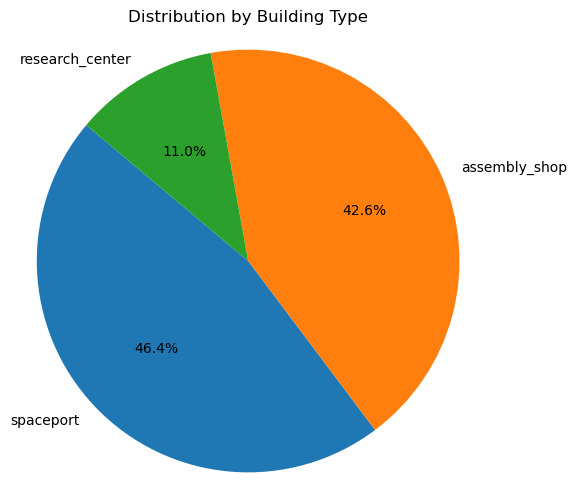

In [161]:
building_type_counts = game_source['building_type'].value_counts()

# pie
plt.figure(figsize=(6, 6))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution by Building Type')

plt.show()

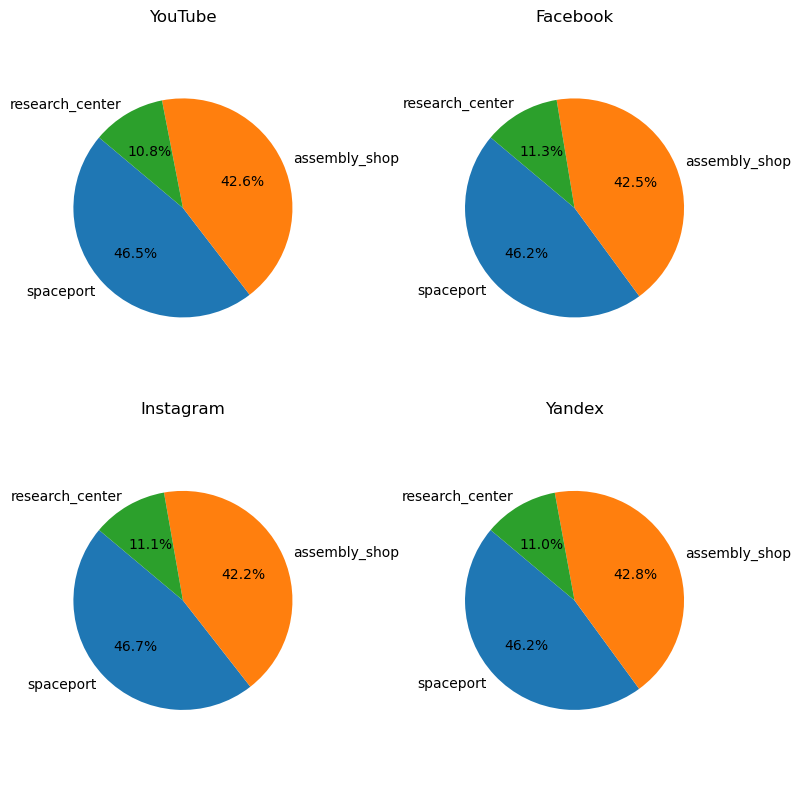

In [162]:
fig, axs = plt.subplots(rows, columns, figsize=(8, 8))

for i, channel in enumerate(channels):
    channel_data = game_source.query(f'source == "{channel}"')
    building_type_counts = channel_data['building_type'].value_counts()
    ax = axs[i // columns, i % columns]
    ax.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(channel_names[i])

plt.tight_layout()
plt.show()

Users generally prefer to build spaceports for recruiting armies, which is logical considering that warfare is the predominant strategy. Assembly workshops are also built in large numbers and occupy the second-largest portion of the pie. Only 11% is attributed to the research center.

In [163]:
# filtr 'building'
building_data = game_source[game_source['event'] == 'building']

# filtr by 'source' and count users
building_users_by_source = building_data.groupby('source')['user_id'].count().reset_index()
building_users_by_source.rename(columns={'user_id': 'building'}, inplace=True)

# group by 'source'
total_users_by_source = game_source.groupby('source')['user_id'].nunique().reset_index()
total_users_by_source.rename(columns={'user_id': 'total_users'}, inplace=True)

# merge
result = pd.merge(building_users_by_source, total_users_by_source, on='source')

# add a column for the 'building' share, as a percentage of the total.
result['avg_buildings'] = result['building']/result['total_users']
result.sort_values(by='avg_buildings').round(2)

,source,building,total_users,avg_buildings
3,youtube_channel_reklama,24978,2686,9.30
2,yandex_direct,45032,4817,9.35
1,instagram_new_adverts,31815,3347,9.51
0,facebook_ads,26131,2726,9.59


It appears that, on average, there are 9 building constructions per unique user, with Facebook users being more active builders compared to users from YouTube, who build slightly less.

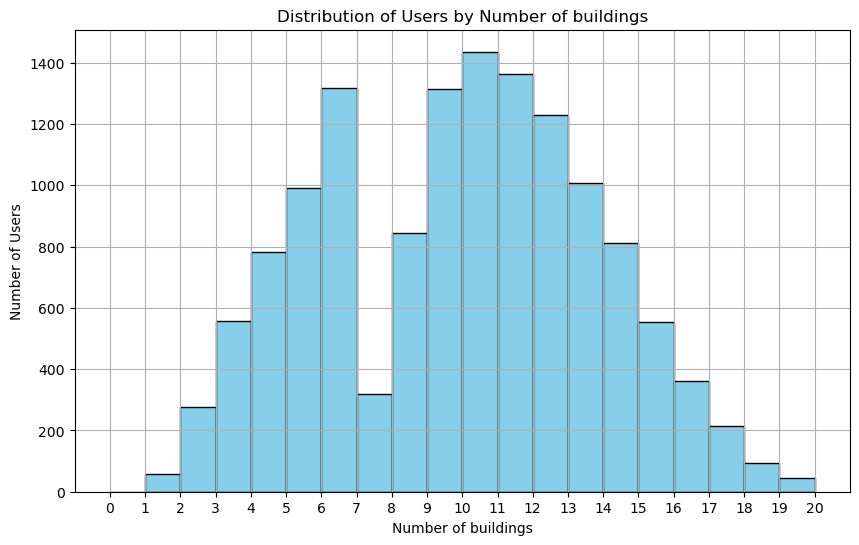

In [164]:
# group the data by 'user_id' and count the number of constructed buildings for each user
user_building_counts = building_data.groupby('user_id')['event'].count()

bin_range = range(0, 21)

# hist
plt.figure(figsize=(10, 6))
plt.hist(user_building_counts, bins=bin_range, color='skyblue', edgecolor='black')
plt.xlabel('Number of buildings')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Number of buildings')
plt.xticks(bin_range)
plt.grid(True)

plt.show()

Users most commonly build 10, 11, 9, or 6 buildings. Additionally, the distribution of buildings per unique user is nearly identical across different user acquisition channels.

[Tableau](https://public.tableau.com/app/profile/tatyana.mayorova/viz/NumberofBuildingsbyUsers/Dashboard1)

### Level completion

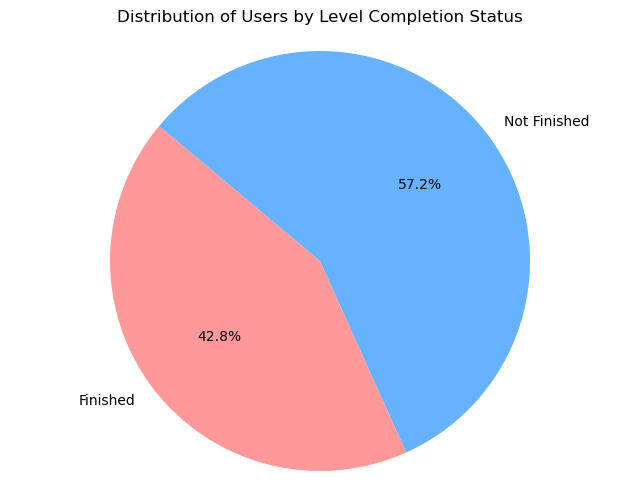

In [165]:
finished_users = game_source[game_source['event'] == 'finished_stage_1']['user_id'].nunique()
not_finished_users = game_source[game_source['strategy'] == 'not finished']['user_id'].nunique()
data = [finished_users, not_finished_users]
labels = ['Finished', 'Not Finished']
colors = ['#FF9999', '#66B2FF']

plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Users by Level Completion Status')

plt.show()

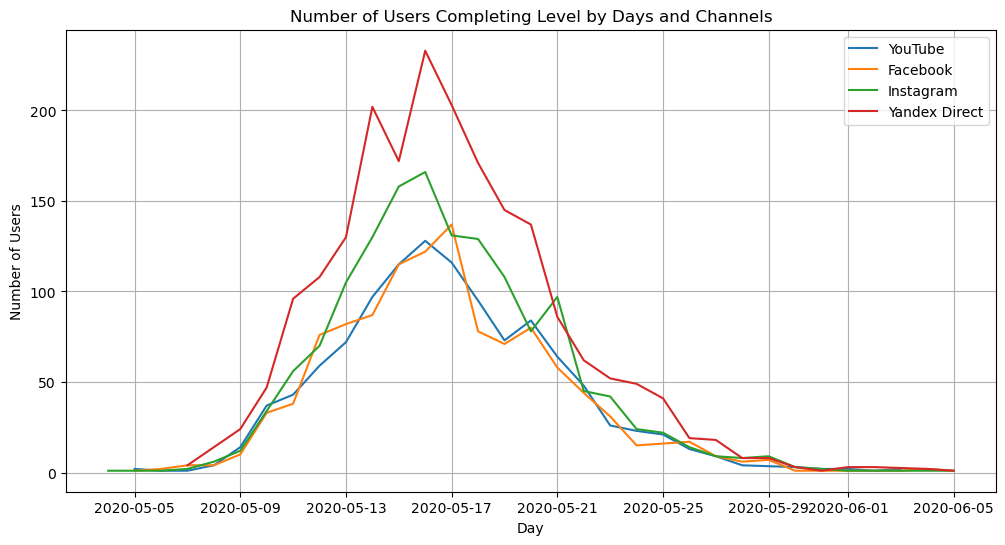

In [166]:
# Create a figure and axes for the graph
fig, ax = plt.subplots(figsize=(12, 6))

# Create a list of data by channels.
channel_data_list = [youtube, fb, insta, ya]
channel_names = ["YouTube", "Facebook", "Instagram", "Yandex Direct"]

# Iterate through each channel and create lines for the graph.
for i, channel_data in enumerate(channel_data_list):
    finished_users = channel_data[channel_data['event'] == 'finished_stage_1'].groupby(channel_data['event_datetime'].dt.date)['user_id'].nunique().reset_index()
    ax.plot(finished_users['event_datetime'], finished_users['user_id'], label=channel_names[i])

# Adjusting the appearance of the graph.
ax.set_xlabel('Day')
ax.set_ylabel('Number of Users')
ax.set_title('Number of Users Completing Level by Days and Channels')
ax.legend()

plt.grid(True)
plt.show()

The graph shows that the peak in the number of level completions occurs around the 14th to the 17th day for users who started the game between May 4th and May 10th.

In [167]:
# Calculate the total number of users for each channel.
total_users_by_source = game_source.groupby('source')['user_id'].nunique().reset_index()
filtered_data = game_source.query('event == "finished_stage_1"')
# Calculate the number of unique users who completed the level for each channel.
finished_users_by_source = filtered_data.groupby('source')['user_id'].nunique().reset_index()

# merge
merged_data = finished_users_by_source.merge(total_users_by_source, on='source', suffixes=('_finished', '_total'))

# Calculate the proportion of players who completed the game out of the total number.
merged_data['share'] = merged_data['user_id_finished'] / merged_data['user_id_total']

# sort
merged_data.sort_values(by='share', ascending=False).round(3)

,source,user_id_finished,user_id_total,share
1,instagram_new_adverts,1466,3347,0.438
3,youtube_channel_reklama,1159,2686,0.431
2,yandex_direct,2042,4817,0.424
0,facebook_ads,1150,2726,0.422


Despite there being more level completions among users who came from Yandex Direct, the proportion of such users by channels is nearly the same. Let's examine how the number of buildings constructed differs between users who completed the level and those who didn't.

In [168]:
# Filter the data for those who completed the level and those who did not
finished = game_source[game_source['event'] == 'finished_stage_1']
not_finished = game_source[game_source['strategy'] == 'not finished']

# Group the data for users who built buildings
building_users = game_source[game_source['event'] == 'building']['user_id']

# Find the intersection of users who completed the level and those who built buildings
finished_building_users = set(finished['user_id']) & set(building_users)
not_finished_building_users = set(not_finished['user_id']) & set(building_users)

# Calculate the median number of buildings constructed for both groups
build_finished = game_source[game_source['user_id'].isin(finished_building_users)]['user_id'].value_counts().median()
build_not_finished = game_source[game_source['user_id'].isin(not_finished_building_users)]['user_id'].value_counts().median()

# Display the results
print(f"Median number of buildings constructed by users who completed the level: {build_finished:.2f}")
print(f"Median number of buildings constructed by users who did not complete the level: {build_not_finished:.2f}")

Median number of buildings constructed by users who completed the level: 12.00
Median number of buildings constructed by users who did not complete the level: 8.00


### Duration

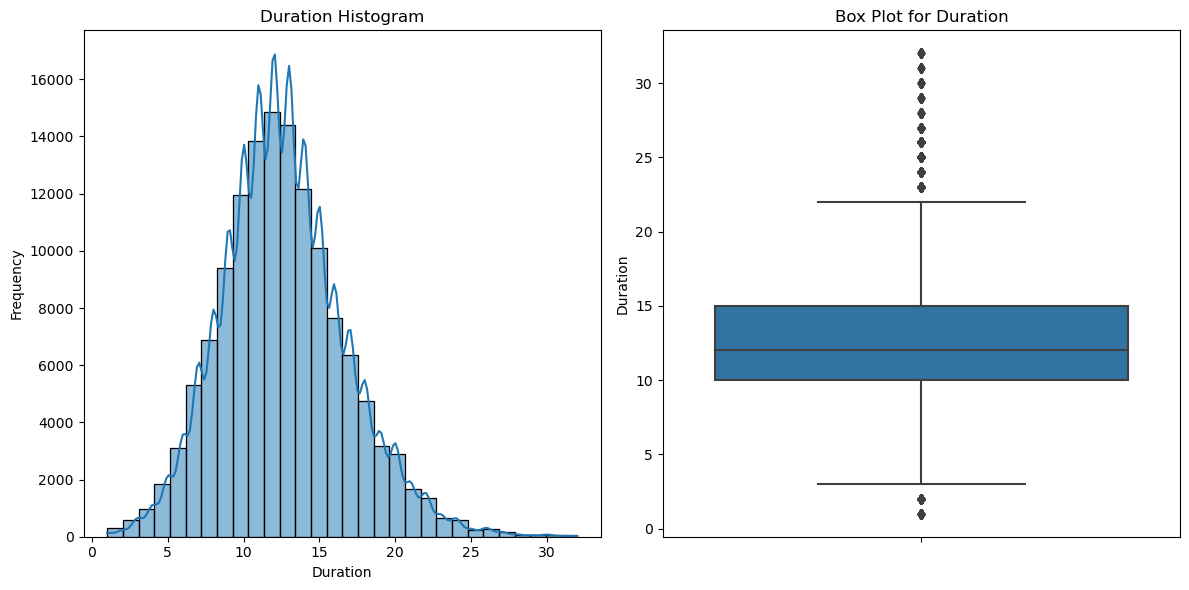

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# hist
sns.histplot(data=game_source, x='duration', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Duration Histogram')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=game_source, y='duration', ax=axes[1])
axes[1].set_title('Box Plot for Duration')
axes[1].set_ylabel('Duration')

# display
plt.tight_layout()
plt.show()

The majority of users spend between 9 to 13 days in the game.

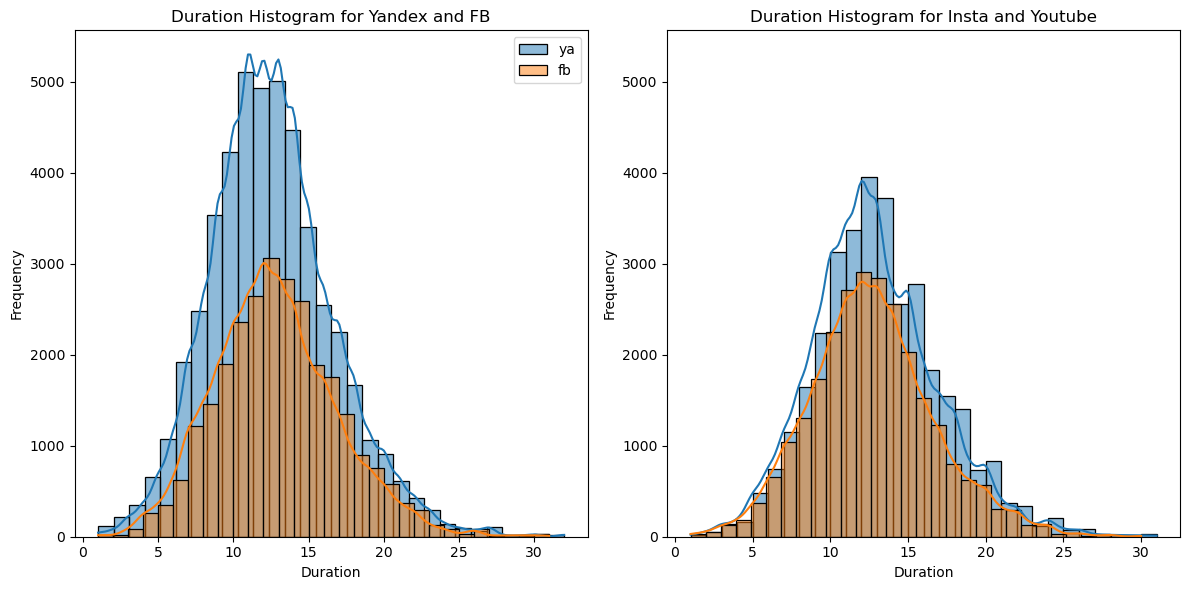

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# hist for 'ya' and 'fb'
sns.histplot(data=ya, x='duration', bins=30, kde=True, ax=axes[0], label='ya')
sns.histplot(data=fb, x='duration', bins=30, kde=True, ax=axes[0], label='fb')
axes[0].set_title('Duration Histogram for Yandex and FB')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for 'insta' and 'youtube' channels
sns.histplot(data=insta, x='duration', bins=30, kde=True, ax=axes[1], label='insta')
sns.histplot(data=youtube, x='duration', bins=30, kde=True, ax=axes[1], label='youtube')
axes[1].set_title('Duration Histogram for Insta and Youtube')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# standardize the Y-axis scales.
axes[0].set_ylim([0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])])
axes[1].set_ylim([0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])])

plt.tight_layout()
plt.show()

When looking at the number of days that users spend in the game from different acquisition channels, the pattern does not significantly differ. The peaks of the distributions are around the 11th to 13th day.

In [171]:
game_source.groupby('source')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
facebook_ads,27672.0,12.712670,4.080177,1.0,10.0,12.0,15.0,31.0
instagram_new_adverts,33757.0,12.787451,4.068381,1.0,10.0,12.0,15.0,31.0
yandex_direct,47694.0,12.618736,4.072362,1.0,10.0,12.0,15.0,32.0
youtube_channel_reklama,26516.0,12.669219,4.045935,1.0,10.0,12.0,15.0,30.0


### Cost

#### The cost per click from each source.

In [172]:
# convert the date columns to datetime.
game_source['first_day'] = pd.to_datetime(game_source['first_day'])
ad['day'] = pd.to_datetime(ad['day'])

# shift the dates in the 'ad' dataset one day forward.
ad['day_shifted'] = ad['day'] + pd.DateOffset(days=1)

# We combine the data based on matching dates and channels.
merged_data = game_source.groupby(['first_day', 'source'])['user_id'].nunique().reset_index().merge(
    ad.groupby(['day_shifted', 'source'])['cost'].sum().reset_index(),
    left_on=['first_day', 'source'], right_on=['day_shifted', 'source'],
    how='inner'
)

# We remove the unnecessary 'day_shifted' column if it is no longer needed.
merged_data.drop(columns='day_shifted', inplace=True)
merged_data['click_cost'] = merged_data['cost'] / merged_data['user_id']
merged_data['click_cost'] = merged_data['click_cost'].round(2)

In [173]:
# sort
merged_data.sort_values(by=['first_day', 'click_cost'], inplace=True)

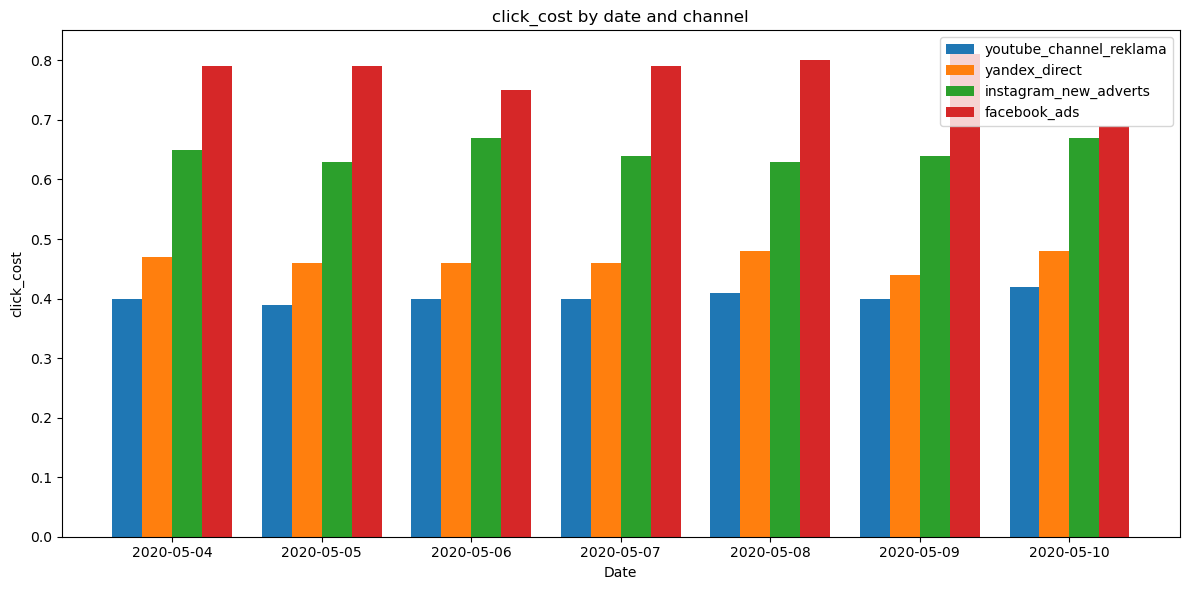

In [174]:
# The unique 'source' channels.
sources = merged_data['source'].unique()

# Determining the width of each column.
bar_width = 0.2
index = np.arange(len(merged_data['first_day'].dt.date.unique()))

# Creating a bar chart for each channel.
plt.figure(figsize=(12, 6))

for i, source in enumerate(sources):
    source_data = merged_data[merged_data['source'] == source]
    plt.bar(index + i * bar_width, source_data['click_cost'], bar_width, label=source)

plt.title('click_cost by date and channel')
plt.xlabel('Date')
plt.ylabel('click_cost')
plt.xticks(index + bar_width * (len(sources) - 1) / 2, merged_data['first_day'].dt.date.unique())
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

The cost per click is consistently distributed across channels. Facebook is the most expensive acquisition channel, while YouTube has the lowest cost per click.

In [175]:
merged_data.groupby('source')['click_cost'].mean().round(2)

source
facebook_ads               0.77
instagram_new_adverts      0.65
yandex_direct              0.46
youtube_channel_reklama    0.40
Name: click_cost, dtype: float64

<div class="alert alert-success">
    <p><b> ! : </b></p>
    
Finally, we've found the first metric that shows significant differences between channels. It seems that this metric will ultimately form the basis for ranking.
</div>


#### The total amount spent on each source

In [176]:
source_costs = merged_data.groupby('source')['cost'].sum().reset_index()
source_costs

,source,cost
0,facebook_ads,2140.90
1,instagram_new_adverts,2161.45
2,yandex_direct,2233.11
3,youtube_channel_reklama,1068.11


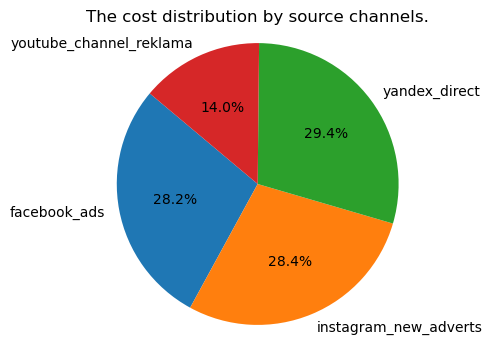

In [177]:
# pie
plt.figure(figsize=(4, 4))
plt.pie(source_costs['cost'], labels=source_costs['source'], autopct='%1.1f%%', startangle=140)
plt.title('The cost distribution by source channels.')

plt.axis('equal')  
plt.show()

The share of expenses on all channels except YouTube is around 30%, with YouTube being the most cost-effective channel.

### Hypothesis

**Let's test the hypothesis that the completion time of a level differs depending on the strategy of completion:**
- H0: Completion time is not dependent on the strategy.
- H1: Completion time is dependent on the strategy.

In [178]:
strategy_A = filtered_data[filtered_data['strategy'] == 'war']['duration']
strategy_B = filtered_data[filtered_data['strategy'] == 'project']['duration']

# t-test
t_statistic, p_value = ttest_ind(strategy_A, strategy_B)

# Evaluate the test results
alpha = 0.05  
if p_value < alpha:
    print("We reject the null hypothesis: the means are different.")
else:
    print("There is not enough evidence to reject the null hypothesis: the means are equal.")

We reject the null hypothesis: the means are different.


**Let's test the hypothesis that the number of players who complete the level differs depending on the user acquisition channel:**
- H0: The number of players who complete the level is not dependent on the channel.
- H1: The number of players who complete the level is dependent on the channel.

In [179]:
# Create a contingency table
contingency_table = pd.crosstab(filtered_data['source'], filtered_data['user_id'].nunique())

# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluate the test results.
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis: there is a statistically significant association between the user acquisition channel and the number of players who completed the level.")
else:
    print("There is not enough evidence to reject the null hypothesis: the number of players who completed the level is not dependent on the user acquisition channel.")

There is not enough evidence to reject the null hypothesis: the number of players who completed the level is not dependent on the user acquisition channel.


**Which strategy is chosen more frequently for winning?**

- H0: Among players who completed the level, there is no difference in the choice of the "war" and "project" strategies; the choice of strategy does not influence successful level completion.

- H1: Among players who completed the level, there is a statistically significant difference in the choice of the "war" and "project" strategies; the choice of strategy influences successful level completion.

In [180]:
war_f = len(finished[finished['strategy'] == 'war'])
pro_f = len(finished[finished['strategy'] == 'project'])

# The total number of all users who completed the level.
n_total_finished = len(finished)

# Performing a Z-test for the difference in completion rates between strategies.
z_stat, p_value = sm.stats.proportions_ztest([war_f, pro_f], [n_total_finished, n_total_finished])

print(f"Z-статистика: {z_stat}")
print(f"P-значение: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("We reject the null hypothesis: the difference is statistically significant.")
else:
    print("There is not enough evidence to reject the null hypothesis: the difference is not statistically significant.")

Z-статистика: 38.66086130712516
P-значение: 0.0
We reject the null hypothesis: the difference is statistically significant.


## Conclusions

| Parameter                                | Yandex | Instagram | FB   | Youtube | Comment                                       |
|------------------------------------------|--------|-----------|------|---------|-----------------------------------------------|
| Share of unique users                    | 35.5   | 24.7      | 20.1 | 19.8    |                                               |
| Strategies: not completed % of all       | 57.6   | 56.2      | 57.8 | 56.9    |                                               |
| Strategies: war                          | 29.5   | 29.6      | 27.6 | 29.0    | It is statistically true that this strategy leads to level completion more often |
| Number of buildings per unique player    | 9.35   | 9.51      | 9.59 | 9.3     | The more buildings, the more ad impressions  |
| Average duration, days                   | 12.61  | 12.78     | 12.71| 12.66   |                                               |
| Average cost per click                   | 0.46   | 0.65      | 0.77 | 0.4     |                                               |
| Acquisition costs                        | 2233.11| 2161.45   | 2140.9| 1068.11 |                                               |


In [181]:
income = building_users_by_source.merge(source_costs, on='source')
income['avg'] = income['cost']/income['building']
income.sort_values(by='avg')

,source,building,cost,avg
3,youtube_channel_reklama,24978,1068.11,0.042762
2,yandex_direct,45032,2233.11,0.049589
1,instagram_new_adverts,31815,2161.45,0.067938
0,facebook_ads,26131,2140.90,0.081930


### Analysis and Ranking of User Acquisition Sources

If we consider effectiveness in terms of player quality (game duration, level completion) and cost (cost per click), and also take into account that building structures will generate future ad revenue, the channels should be ranked as follows:

The dependence on qualitative characteristics such as strategy choice, level completion, and game duration is practically indistinguishable (indicators vary from channel to channel by fractions). Cost is the priority indicator for ranking.

1. **Yandex** has the highest share of unique users and a low cost per click, making it the most attractive source for user acquisition.

2. **Youtube** shows the best cost per constructed building, which will aid in monetization, and the cost per click is the lowest here. Investing money in this channel is a good choice.

3. **Instagram** lags behind the top two channels, with a cost per click that is not the highest but not the lowest either.

4. **Facebook** is the most expensive channel in terms of cost per click.

Therefore, when placing advertisements and optimizing acquisition costs, it is advisable to pay the most attention to **Yandex**, followed by **Youtube**, and **Instagram** depending on monetization and user retention goals. **Facebook** can be considered a lower-priority source.

<div style="background:#B0E0E6;color:#000; padding:10px; margin-top:10px">
    <p><big><b> Links:</b></big></p>
    
[Tableau](https://public.tableau.com/app/profile/tatyana.mayorova/viz/NumberofBuildingsbyUsers/Sheet4)
    
    
[Presentation](https://disk.yandex.ru/d/CeK9hJERj7b5ig)
</div>